In [1]:
import pandas as pd

In [55]:
df = pd.read_csv(r"D:\Information Technology\H&M data analysis\transactions_train.csv")
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


#### Here we can see the data in 'price' column like in very small amout, here it might be scalled like the range between '0 to 1' or maybe its the Prices in Thousands (K-Scaling), due to, no such clear information we have , so that i am not converting it here, but procceding with the analysis as it is data we have.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [59]:
df.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [60]:
df['t_dat'] = pd.to_datetime(df['t_dat'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [66]:
# Check missing values
print(df.isnull().sum())

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


In [68]:
# Check duplicates
print(df.duplicated().sum()) # we can not drop the duplicate values here because one coustomer can buy one product multiple time so that being duplicate is normal

2974905


In [69]:
print(df['customer_id'].duplicated().sum())

30426043


In [71]:
print(df['price'].describe()) # analysing the outliers here in the 'price' column

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64


In [74]:
print(df['sales_channel_id'].nunique()) # here we generaly see 1 = online, 2 = offline, we can map the data as well, like 1 converts to online and 2 converts to offline

2


In [90]:
print(df['sales_channel_id'].value_counts()) # here we can see specific order channel counts, hence, offline orders are more then online

sales_channel_id
2    22379862
1     9408462
Name: count, dtype: int64


In [92]:
df['Sales_channel'] = df['sales_channel_id'].map({1: 'online' , 2: 'offline'}) # mapping 1 as online and 2 as offline, as added a new column in a dataset 

In [106]:
print(df['Sales_channel'].head(10))

0    offline
1    offline
2    offline
3    offline
4    offline
5    offline
6    offline
7     online
8     online
9    offline
Name: Sales_channel, dtype: object


In [104]:
df.columns # checking added new column in dataset 

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'Sales_channel'],
      dtype='object')

In [108]:
print(df['article_id'].value_counts()) # checking unique article id and its total number of count

article_id
706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: count, Length: 104547, dtype: int64


In [114]:
df['t_dat'].max()

Timestamp('2020-09-22 00:00:00')

In [116]:
df['t_dat'].min()

Timestamp('2018-09-20 00:00:00')

### Below we have analysed the trand of online shoping over time

In [132]:
online_df = df[df['sales_channel_id'] == 1]

In [134]:
daily_online_sales = online_df.groupby('t_dat').size().reset_index(name= 'online_purchases')
print(daily_online_sales.head())

       t_dat  online_purchases
0 2018-09-20             12656
1 2018-09-21             13848
2 2018-09-22              7735
3 2018-09-23              6853
4 2018-09-24              8453


In [138]:
weekly_online_sales = online_df.groupby(pd.Grouper(key='t_dat', freq='W')).size().reset_index(name='weekly_online_purchases')
print(weekly_online_sales.head())

       t_dat  weekly_online_purchases
0 2018-09-23                    41092
1 2018-09-30                   166234
2 2018-10-07                    94954
3 2018-10-14                   106297
4 2018-10-21                    80152


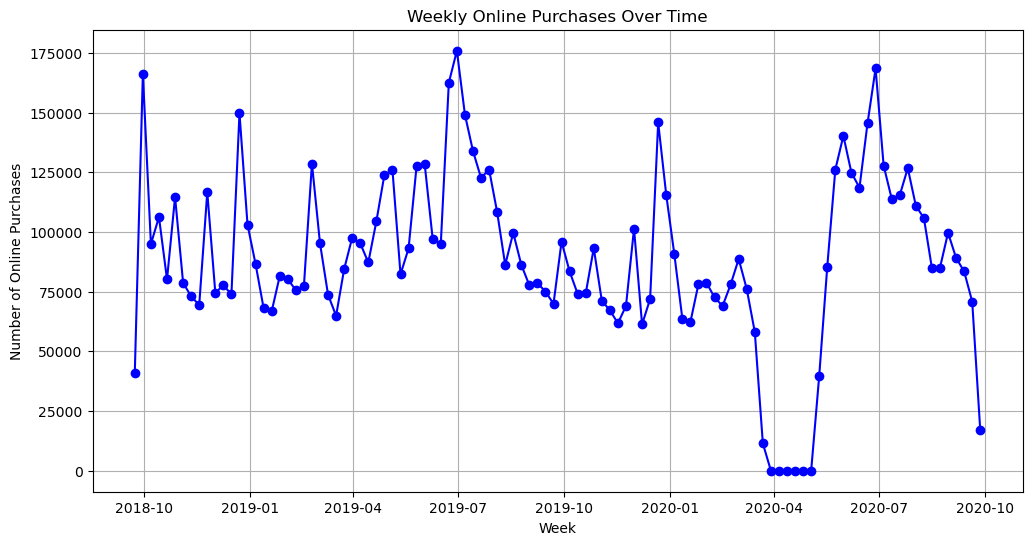

In [153]:
plt.figure(figsize=(12,6))
plt.plot(weekly_online_sales['t_dat'], weekly_online_sales['weekly_online_purchases'], color='blue', marker='o', linestyle='-')
plt.title('Weekly Online Purchases Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Online Purchases')
plt.grid(True)
plt.show()

In [145]:
offline_df = df[df['sales_channel_id'] == 2]
offline_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,Sales_channel
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,offline
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,offline
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,offline
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,offline
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,offline


In [147]:
weekly_offline_sales = offline_df.groupby(pd.Grouper(key='t_dat', freq='W')).size().reset_index(name='weekly_offline_purchases')
print(weekly_offline_sales.head())

       t_dat  weekly_offline_purchases
0 2018-09-23                    124715
1 2018-09-30                    262735
2 2018-10-07                    163289
3 2018-10-14                    226041
4 2018-10-21                    224757


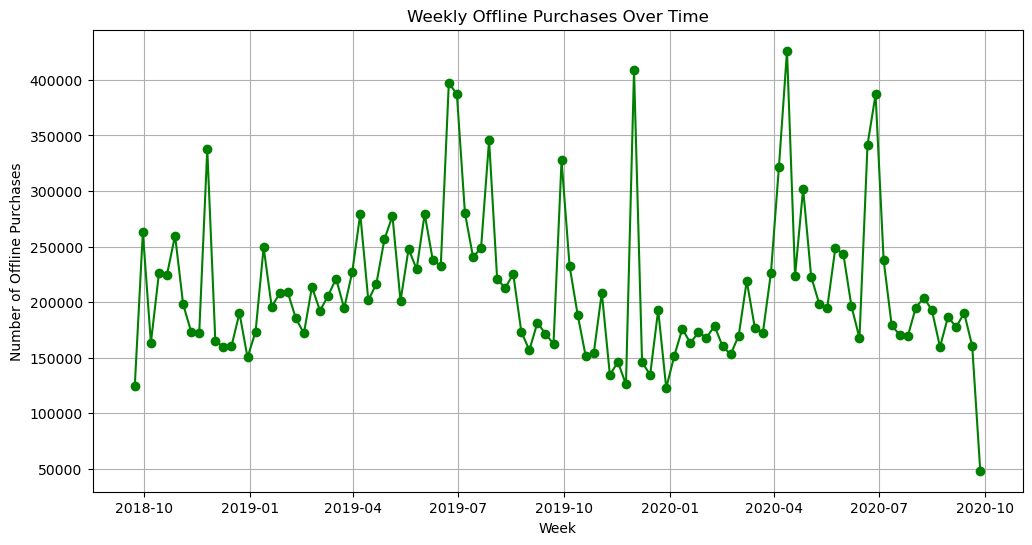

In [151]:
plt.figure(figsize=(12,6))
plt.plot(weekly_offline_sales['t_dat'], weekly_offline_sales['weekly_offline_purchases'], color='green', marker='o', linestyle='-')
plt.title('Weekly Offline Purchases Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Offline Purchases')
plt.grid(True)
plt.show()

In [167]:
top_10_articles = df['article_id'].value_counts().head(10)
top_10_articles

article_id
706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
464297007    25025
372860002    24458
610776001    22451
399223001    22236
706016003    21241
Name: count, dtype: int64

In [173]:
weekly_article_trand = df[df['article_id'] == 50287]

In [175]:
weekly_article_trand = article_trand_df.groupby(pd.Grouper(key='t_dat', freq='W')).size().reset_index(name='weekly_art_trand')
print(weekly_article_trand.head())

       t_dat  weekly_art_trand
0 2018-12-02               192
1 2018-12-09               592
2 2018-12-16               583
3 2018-12-23               432
4 2018-12-30               378


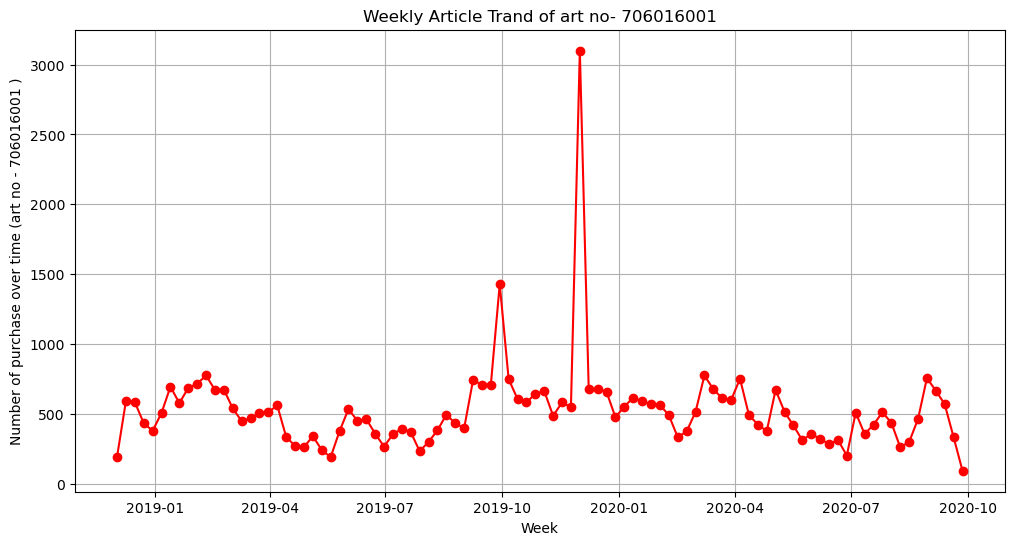

In [179]:
plt.figure(figsize=(12,6))
plt.plot(weekly_article_trand['t_dat'], weekly_article_trand['weekly_art_trand'], color='red', marker='o', linestyle='-')
plt.title('Weekly Article Trand of art no- 706016001')
plt.xlabel('Week')
plt.ylabel('Number of purchase over time (art no - 706016001 )')
plt.grid(True)
plt.show()

In [190]:
# Correct way using double brackets for selecting multiple columns
top_10_customer_article_pairs = df[['customer_id', 'article_id']].value_counts().head(10)

print(top_10_customer_article_pairs)


customer_id                                                       article_id
d00063b94dcb1342869d4994844a2742b5d62927f36843164fb3f818f630bca9  678342001     570
94665b46e194622ccdbcadc0170f13a2f8ede1ff6d057d43a19b8938c808b662  629420001     199
61da44a2758206d5701771f4315637b40c8321b511191654fb1430a6408e4dfa  507909001     188
ef38ec0f0cb29ee8bbb87efc82fd16f4b99127e3eeefe69c9b5fce627e93e270  570002001     170
5cba04ed9a3759bc02a8a9e01efccc07ce76c35c1a70dce6c5cedba32ce3ab6b  688558002     166
ebc0f83524828ee05e9dc70b50d21a261000d2015f6b2006289199a93ccf0702  685347001     130
ce79a54991bb7c2c2d9427ae1e7f1d8c8b037f8d74b2fe659e87ad70e73ca6e7  570004009     124
d5902b0523749b377ab32f6de5e9a739cf690bb8dd0aa554f23d4b15937152dc  179123001     120
0152964ef19824d631d28ee3327a010fbfc528cdaf5bf063db6395b84a755a30  756322001     120
8f5f1e993eff204ca7206cabe0fc6dfb75759994cacbf4c32c84ec5699a51c5d  189634001     120
Name: count, dtype: int64
